# Orbital speed

## Mean orbital speed

$\large v \approx \sqrt{\frac{\mu}{r}}$

Where:

$\mu = GM_{earth}$ - Standard gravitational parameter

$G$ - Gravitational constant ($G \approx 6.674*10^{-11} N \cdot kg^{-2} \cdot m^{2}$)

$M_{earth}$ - Earth mass in kilograms

$r$ - radius satellite is currently at

Or, using gravitational accelleration

$\large v \approx \sqrt{2g_{0}r}$

Where:

$g_{0}$ - is the surface gravity ($g_{0} = 9.80665 \frac{m}{s^2}$)

In [1]:
import numpy as np

In [2]:
G_CONST = 6.674 * 10**-11

def mean_orbital_speed(mu_body, r):
    return np.sqrt(mu_body / r)

def std_grav_param(body_mass):
    return G_CONST * body_mass

## Precise orbital speed

Precise speed of a body at any given point in its trajectory [$m/s$]

$\large v = \sqrt{ \mu (\frac{2}{r} - \frac{1}{a}) }$

Where:

$a$ - semi-major axis

## Escape velocity

$\large v_e = \sqrt{\frac{2GM}{r}}$

In [3]:
def escape_velocity(mu_body, r):
    return np.sqrt((2 * mu_body) / r)

## Examples

### Mean orbital speed and escape velocity at 100km orbit

In [4]:
import matplotlib.pyplot as plt
import matplotlib

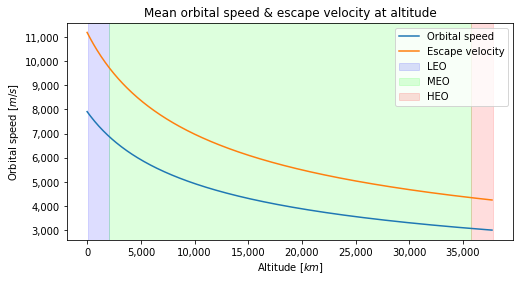

In [5]:
EARTH_MASS = 5.97237 * 10**24
MU_EARTH = std_grav_param(EARTH_MASS)

EARTH_RADIUS = 6.371 * 10**6
LEO_ORBIT = 100
MEO_ORBIT = 2000
HEO_ORBIT = 35786

r = np.arange(0, HEO_ORBIT + 2000, 100)

v = mean_orbital_speed(MU_EARTH, EARTH_RADIUS + (r * 10**3))
ev = escape_velocity(MU_EARTH, EARTH_RADIUS + (r * 10**3))


fig, ax = plt.subplots(1, figsize=(8, 4))
formatter = matplotlib.ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x)))

ax.plot(r, v, label='Orbital speed')
ax.plot(r, ev, label='Escape velocity')

# orbits
ax.axvspan(LEO_ORBIT,  MEO_ORBIT, color='#0000ff22', label='LEO')
plt.axvspan(MEO_ORBIT, HEO_ORBIT, color='#00ff0022', label='MEO')
plt.axvspan(HEO_ORBIT, HEO_ORBIT + 2000, color='#ff000022', label='HEO')

ax.get_xaxis().set_major_formatter(formatter)
ax.get_yaxis().set_major_formatter(formatter)
ax.set_title('Mean orbital speed & escape velocity at altitude')
ax.set_xlabel('Altitude [$km$]')
ax.set_ylabel('Orbital speed [$m/s$]')
ax.legend(loc='upper right')
plt.show();

In [6]:
r = 100*10**3
mean_orbital_speed(MU_EARTH, EARTH_RADIUS + r)

7848.393219267663

In [7]:
escape_velocity(MU_EARTH, EARTH_RADIUS + r)

11099.304133525366

**Observe**

- Mean orbital speed and escape velocity decreases with distance ([3rd Kepler Law](https://en.wikipedia.org/wiki/Kepler's_laws_of_planetary_motion#Third_law_of_Kepler))
- Mean orbital speed at 100km above Earth surface is **7.8 km/s**
- Earth escape velocity at 100km orbit is approximately **11 km/s**

## Sources

- https://en.wikipedia.org/wiki/Escape_velocity
- https://en.wikipedia.org/wiki/Orbital_speed
- https://en.wikipedia.org/wiki/Gravitational_constant
- https://en.wikipedia.org/wiki/Kepler's_laws_of_planetary_motion